In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = Image.open('D:\JupyterFile\Lenna.png')

In [2]:
#reference
#https://en.wikipedia.org/wiki/Canny_edge_detector
#https://blog.csdn.net/linqianbi/article/details/78884467

def canny_edgedect(img,thrl = 0.1,thrh = 0.3):
    gaussian_filter = np.array([[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]])
    soble_filter = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    ygray = np.zeros([img.size[1],img.size[0]])
    xgray = np.zeros([img.size[1],img.size[0]])
    gray = img.convert('L')
    gray = np.array(gray)
    bb = np.pad(gray,2,'edge')
    
    #Gaussian filter
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            gray[i,j] = int(np.sum(bb[i:i+5,j:j+5]*gaussian_filter)/159)
    
    #Soble operator
    bb = np.pad(gray,1,'edge')
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            ygray[i,j] = np.sum(bb[i:i+3,j:j+3]*soble_filter)
            xgray[i,j] = np.sum(bb[i:i+3,j:j+3]*soble_filter.T)
    edge = np.rint((ygray**2+xgray**2)**0.5)
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            if xgray[i,j] == 0:
                xgray[i,j] = 0.00000001
    angle = np.arctan2(ygray,xgray)*180/np.pi
    
    #Gradient magnitude thresholding or lower bound cut-off suppression
    fedge = np.pad(edge,1,'edge')
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            if fedge[i+1,j+1] != 0:
                if 22.5 > angle[i][j] >= -22.5 or 180 >= angle[i][j] >= 157.5 or -157.5 > angle[i][j] >= -180:
                    if fedge[i + 1,j + 1] < fedge[i + 1,j + 2] or fedge[i + 1,j + 1] < fedge[i + 1,j]:
                        edge[i,j] = 0
                elif 67.5 > angle[i][j] >= 22.5 or -112.5 > angle[i][j] >= -157.5:
                    if fedge[i + 1,j + 1] < fedge[i + 2,j + 2] or fedge[i + 1,j + 1] < fedge[i,j]:
                        edge[i,j] = 0
                elif 112.5 > angle[i][j] >= 67.5 or -67.5 > angle[i][j] >= -112.5:
                    if fedge[i + 1,j + 1] < fedge[i + 2,j + 1] or fedge[i + 1,j + 1] < fedge[i,j + 1]:
                        edge[i,j] = 0
                elif 157.5 > angle[i][j] >= 112.5 or -22.5 > angle[i][j] >= -67.5 :
                    if fedge[i + 1,j + 1] < fedge[i + 2,j] or fedge[i,j] < fedge[i,j + 2]:
                        edge[i,j] = 0
    
    #Double threshold
    th = edge.max()
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            if edge[i,j] > th * thrh:
                edge[i,j] = 255
            elif edge[i,j] < th * thrl:
                edge[i,j] = 0
    
    #Edge tracking by hysteresis
    for i in range(img.size[1]):
        for j in range(img.size[0]):
            if th * thrl <= edge[i,j] <= th * thrh:
                if(edge[i-1:i+1,j-1:j+1] == 255).any():
                    edge[i,j] = 255
                else:
                    edge[i,j] = 0
                    
    return Image.fromarray(np.uint8(edge))

(<matplotlib.axes._subplots.AxesSubplot at 0x279cd331c40>,
 <matplotlib.image.AxesImage at 0x279cfc0f310>)

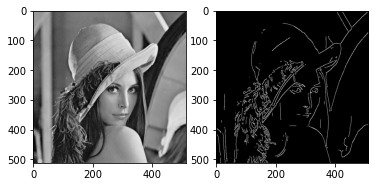

In [3]:
plt.subplot(121),plt.imshow(img.convert('L'),'gray')
plt.subplot(122),plt.imshow(canny_edgedect(img,0.1,0.25),'gray')